### 1. Getting Data

In [1]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Setting up Environment

In [2]:
from pycaret.classification import *
exp = setup(diabetes,target = 'Class variable')

,Description,Value
0,Session id,3360
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### 3. Compare Models

In [3]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7876,0.8253,0.5813,0.7696,0.6539,0.5055,0.5216,0.0100
lda,Linear Discriminant Analysis,0.7820,0.8253,0.5813,0.7558,0.6481,0.4946,0.5099,0.0110
lr,Logistic Regression,0.7802,0.8261,0.5760,0.7516,0.6449,0.4899,0.5041,1.0970
rf,Random Forest Classifier,0.7783,0.8207,0.5924,0.7245,0.6469,0.4888,0.4970,0.0700
gbc,Gradient Boosting Classifier,0.7616,0.8153,0.6091,0.6748,0.6365,0.4608,0.4646,0.0440
catboost,CatBoost Classifier,0.7616,0.8282,0.5868,0.6907,0.6286,0.4559,0.4629,0.7150
et,Extra Trees Classifier,0.7597,0.8160,0.5500,0.7165,0.6118,0.4434,0.4581,0.1090
nb,Naive Bayes,0.7560,0.7995,0.5769,0.6877,0.6204,0.4434,0.4523,0.0100
qda,Quadratic Discriminant Analysis,0.7559,0.7982,0.5649,0.6871,0.6138,0.4386,0.4474,0.0100
ada,Ada Boost Classifier,0.7506,0.7958,0.5667,0.6745,0.6116,0.4305,0.4370,0.0330


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=3360, solver='auto',
                tol=0.0001)

### 4. Create Model

In [4]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.7654,0.5263,0.5882,0.5556,0.3344,0.3355
1,0.7593,0.8000,0.5263,0.7143,0.6061,0.4384,0.4490
2,0.7778,0.8451,0.6842,0.6842,0.6842,0.5128,0.5128
3,0.7407,0.8481,0.6316,0.6316,0.6316,0.4316,0.4316
4,0.7593,0.8571,0.4737,0.7500,0.5806,0.4236,0.4456
5,0.6852,0.7263,0.5263,0.5556,0.5405,0.3014,0.3016
6,0.7593,0.7338,0.6316,0.6667,0.6486,0.4658,0.4661
7,0.7170,0.7635,0.4444,0.6154,0.5161,0.3234,0.3320
8,0.8113,0.8413,0.5556,0.8333,0.6667,0.5423,0.5640


In [5]:
adaboost.estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [6]:
adaboost.feature_importances_

array([0.02, 0.3 , 0.04, 0.02, 0.02, 0.12, 0.36, 0.12])

### 5. Tune Model

In [7]:
tuned_adaboost = tune_model(adaboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.7639,0.5789,0.6471,0.6111,0.4176,0.4190
1,0.7222,0.7865,0.4737,0.6429,0.5455,0.3520,0.3605
2,0.8148,0.8767,0.5263,0.9091,0.6667,0.5507,0.5902
3,0.7778,0.8624,0.6316,0.7059,0.6667,0.5008,0.5025
4,0.7963,0.9053,0.5789,0.7857,0.6667,0.5248,0.5375
5,0.7407,0.7504,0.4737,0.6923,0.5625,0.3874,0.4014
6,0.7963,0.8015,0.6842,0.7222,0.7027,0.5479,0.5484
7,0.7547,0.7968,0.4444,0.7273,0.5517,0.3961,0.4189
8,0.8302,0.8889,0.6111,0.8462,0.7097,0.5940,0.6098


Fitting 10 folds for each of 10 candidates, totalling 100 fits


### 6. Ensemble Model

In [8]:
# Creating a Decision Tree model
dt = create_model('dt') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6296,0.6060,0.5263,0.4762,0.5000,0.2070,0.2077
1,0.5370,0.4985,0.3684,0.3500,0.3590,-0.0030,-0.0030
2,0.7963,0.7707,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.6667,0.6346,0.5263,0.5263,0.5263,0.2692,0.2692
4,0.7037,0.6752,0.5789,0.5789,0.5789,0.3504,0.3504
5,0.7037,0.6511,0.4737,0.6000,0.5294,0.3175,0.3223
6,0.6481,0.6323,0.5789,0.5000,0.5366,0.2554,0.2572
7,0.6038,0.5381,0.3333,0.4000,0.3636,0.0794,0.0801
8,0.7736,0.7476,0.6667,0.6667,0.6667,0.4952,0.4952


In [9]:
# Ensembling a trained Decision Tree model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.7805,0.5263,0.6250,0.5714,0.3682,0.3711
1,0.7222,0.7278,0.5263,0.6250,0.5714,0.3682,0.3711
2,0.7407,0.8060,0.5789,0.6471,0.6111,0.4176,0.4190
3,0.7407,0.8180,0.5263,0.6667,0.5882,0.4028,0.4088
4,0.7778,0.8376,0.6316,0.7059,0.6667,0.5008,0.5025
5,0.7778,0.7346,0.4737,0.8182,0.6000,0.4609,0.4939
6,0.6852,0.8113,0.5263,0.5556,0.5405,0.3014,0.3016
7,0.7925,0.8167,0.5556,0.7692,0.6452,0.5038,0.5172
8,0.7170,0.7984,0.4444,0.6154,0.5161,0.3234,0.3320


### 7. Plot Model

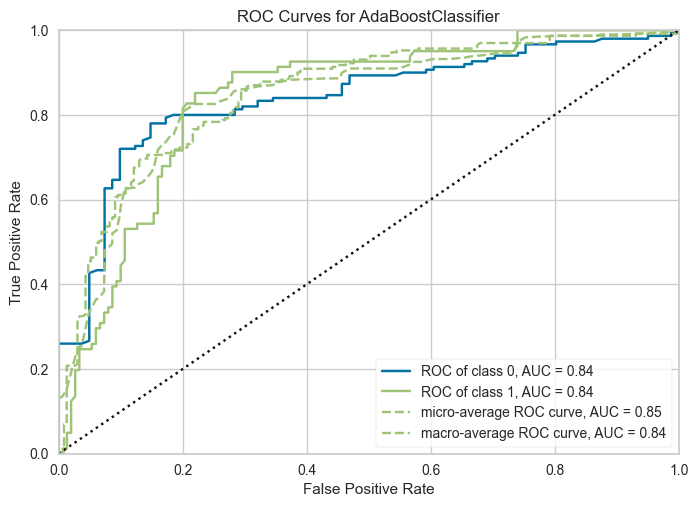

In [10]:
# AUC plot
plot_model(adaboost, plot='auc')

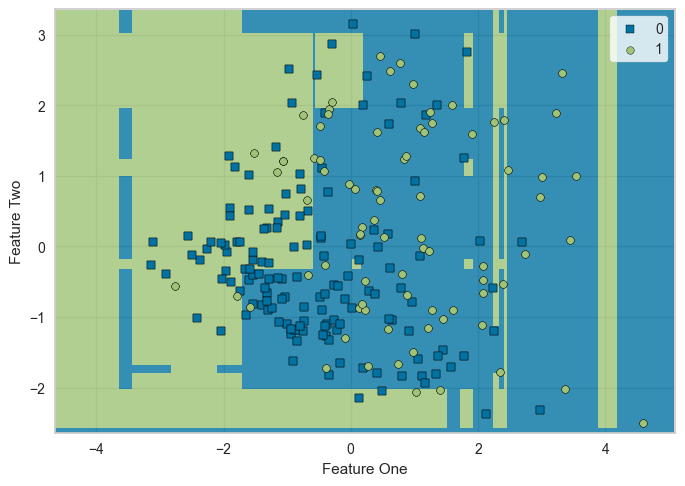

In [11]:
# Decision Boundary
plot_model(adaboost, plot='boundary')

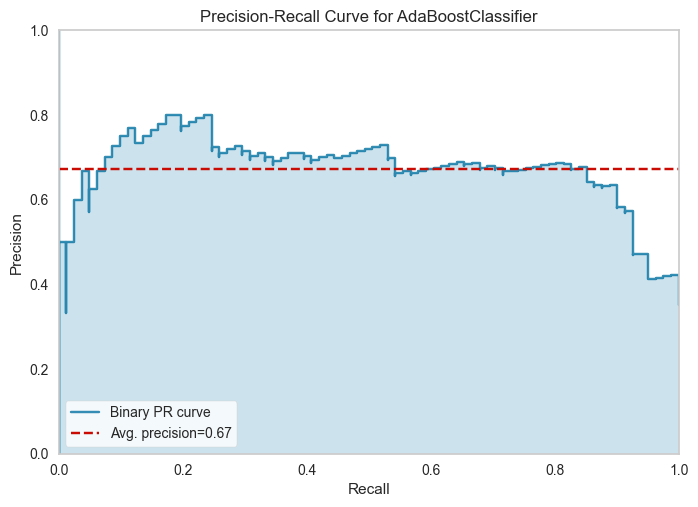

In [12]:
# Precision Recall Curve
plot_model(adaboost, plot='pr')

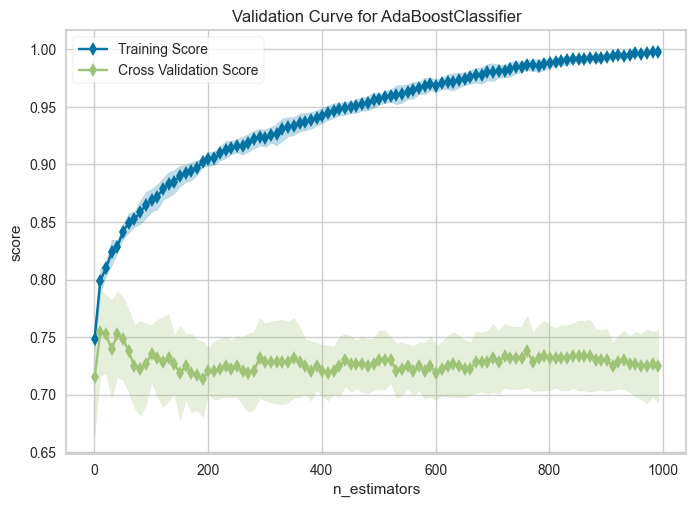

In [13]:
# Validation Curve
plot_model(adaboost, plot='vc')

In [14]:
evaluate_model(adaboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 8. Interpret Model

In [15]:
# Create a model
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.7684,0.5789,0.5789,0.5789,0.3504,0.3504
1,0.7222,0.7669,0.5263,0.6250,0.5714,0.3682,0.3711
2,0.7778,0.8466,0.7368,0.6667,0.7000,0.5242,0.5259
3,0.7222,0.8135,0.6842,0.5909,0.6341,0.4122,0.4151
4,0.8333,0.8677,0.7368,0.7778,0.7568,0.6301,0.6307
5,0.7222,0.7624,0.5789,0.6111,0.5946,0.3836,0.3839
6,0.7037,0.7639,0.6842,0.5652,0.6190,0.3802,0.3848
7,0.7547,0.7524,0.5000,0.6923,0.5806,0.4136,0.4246
8,0.7925,0.8143,0.5556,0.7692,0.6452,0.5038,0.5172


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


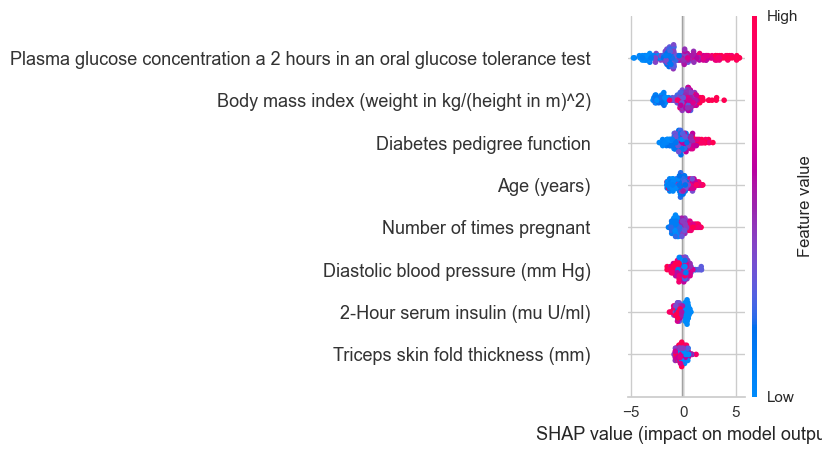

In [17]:
# Summary plot
interpret_model(xgboost)

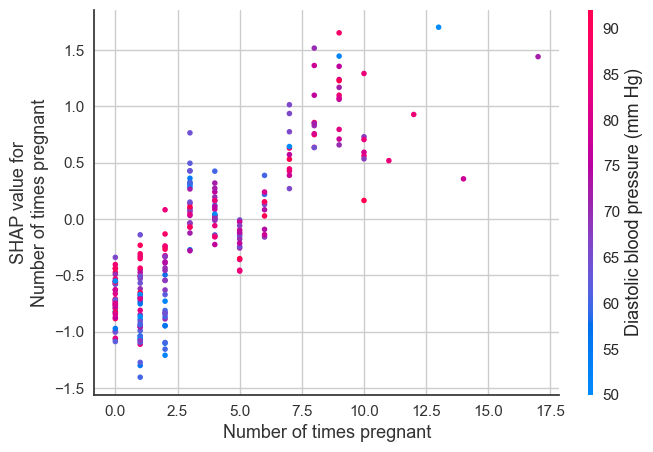

In [18]:
# Correlation plot
interpret_model(xgboost, plot='correlation')

In [19]:
interpret_model(xgboost, plot='reason', observation=0)

### 9. Predict Model

In [20]:
# Create a model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.7361,0.5789,0.6875,0.6286,0.4524,0.4561
1,0.7407,0.7940,0.5789,0.6471,0.6111,0.4176,0.4190
2,0.8519,0.8774,0.6842,0.8667,0.7647,0.6588,0.6686
3,0.7963,0.8504,0.6842,0.7222,0.7027,0.5479,0.5484
4,0.8148,0.8880,0.6842,0.7647,0.7222,0.5840,0.5860
5,0.7593,0.7902,0.4737,0.7500,0.5806,0.4236,0.4456
6,0.7593,0.8383,0.6842,0.6500,0.6667,0.4785,0.4788
7,0.7358,0.7857,0.3889,0.7000,0.5000,0.3399,0.3670
8,0.7925,0.8310,0.5556,0.7692,0.6452,0.5038,0.5172


In [21]:
# Predict test or hold out dataset
rf_pred = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7749,0.8418,0.6420,0.6933,0.6667,0.4971,0.4980


In [22]:
predictions = predict_model(rf, data=diabetes)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9323,0.9765,0.8918,0.9122,0.9019,0.8502,0.8503


### 10. Deploy Model

In [23]:
deploy_model(model=rf, model_name='rf_aws', platform='aws', authentication={'bucket':'pycaret-test'})

Model Successfully Deployed on AWS S3


### 11. Save Model/ Save Experiment

In [24]:
# Creating model
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.7654,0.5263,0.5882,0.5556,0.3344,0.3355
1,0.7593,0.8000,0.5263,0.7143,0.6061,0.4384,0.4490
2,0.7778,0.8451,0.6842,0.6842,0.6842,0.5128,0.5128
3,0.7407,0.8481,0.6316,0.6316,0.6316,0.4316,0.4316
4,0.7593,0.8571,0.4737,0.7500,0.5806,0.4236,0.4456
5,0.6852,0.7263,0.5263,0.5556,0.5405,0.3014,0.3016
6,0.7593,0.7338,0.6316,0.6667,0.6486,0.4658,0.4661
7,0.7170,0.7635,0.4444,0.6154,0.5161,0.3234,0.3320
8,0.8113,0.8413,0.5556,0.8333,0.6667,0.5423,0.5640


In [25]:
# Saving model
save_model(adaboost, model_name='./model/ada_for_deployment')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                                                               fill_value=None,
                                        

In [26]:
save_experiment('./model/my_first_experiment')